In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math

# Define functions 

In [2]:
# -------- epair ------------
def get_new_psi_pairprod_exp(E, E_, rnd_state, is_degree=True):
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    m = 105.7 / 1e3 # in GeV
    m_e =   0.5110 / 1e3 # in GeV
    nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    rms_theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum
    ### theta = abs(rnd_state.normal(0, rms_theta/np.sqrt(2), 1)[0])
    ### theta = rnd_state.normal(rms_theta**2, rms_theta, 1)[0]
    theta_muon = np.sqrt(rnd_state.exponential(rms_theta**2))
    # theta_muon = rnd_state.exponential(rms_theta)
    ### theta_real = abs(theta - rms_theta**2)
    if is_degree:
        return np.rad2deg(theta_muon)
    else:
        return theta_muon

In [3]:
E_i = 1e9 # in GeV  
E_f = 1e8 # in GeV 

rnd_state = np.random.RandomState(3)

angle_1 = get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False)
print('angle in rad: ', angle_1) 
print('cos(angle): ', np.cos(angle_1))

angle in rad:  2.059626912031178e-08
cos(angle):  0.9999999999999998


In [4]:
E_i = 1e9 # in GeV  
E_f = 2e8 # in GeV 

rnd_state = np.random.RandomState(3)

angle_2 = get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False)
print('angle in rad: ', angle_2) 
print('cos(angle): ', np.cos(angle_2))

angle in rad:  1.0298134554710396e-08
cos(angle):  1.0


Text(0.5, 0, 'deflection in rad')

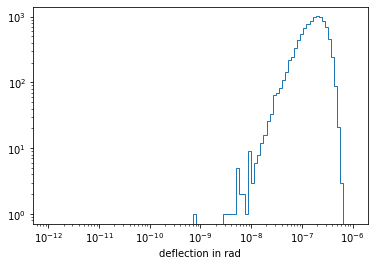

In [5]:
n_events = 10000
E_i = 1e8 * np.ones(n_events)# in GeV  
E_f = 1e7 * np.ones(n_events)# in GeV 

rnd_state = np.random.RandomState(3)

angles = [get_new_psi_pairprod_exp(E_i, E_f, rnd_state, is_degree=False) for E_i, E_f in zip(E_i, E_f)]
# print('angles in rad: ', angles) 
# print('angles inprint('cos(angle): ', np.cos(angles))
plt.hist(angles, bins=np.logspace(-12, -6, 100), histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')

10000.0


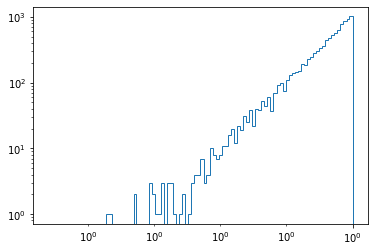

In [6]:
n, x, _ = plt.hist(np.cos(angles), bins=np.logspace(-1e-13, 0, 101), histtype='step')
plt.xscale('log')
plt.yscale('log')
print(np.sum(n))

In [7]:
angle_2

1.0298134554710396e-08

In [8]:
angle_2 * np.tan(angle_2)

1.0605157530692029e-16

In [9]:
np.cos(angle_2)

1.0

In [10]:
np.cos(2 * angle_2) 

0.9999999999999998

In [11]:
np.cos(angle_1 * 2) - angle_1/2 * np.sin(angle_1 * 2)

0.9999999999999987

In [12]:
np.cos(angle_1)

0.9999999999999998

In [13]:
10 * 1 - 9 * 1

1

In [14]:
10 * 0.3 - 9 * 0.3

0.30000000000000027

In [15]:
np.cos(10) + 9 * np.sin(10)

-5.73526152708078

In [16]:
np.cos(1)

0.5403023058681398

In [17]:
np.sin(angle_2 * 0.000001)

1.0298134554710396e-14

In [18]:
1 - 2 * np.sin(angle_1 / 2)**2 == np.cos(angle_1)

True

In [19]:
1 - 2 * np.sin(angle_2 / 2)**2 == np.cos(angle_2)

True

In [20]:
np.cos(angle_2)

1.0

In [21]:
1 - 2 * np.sin(angle_2 / 2)**2

1.0

In [22]:
np.sin(angle_2 / 2)**2 * 2

5.3025787653460147e-17

In [23]:
def cos_sum(t, N=1000):
    return np.sum([(-1)**n / math.factorial(2 * n) * t**(2 * n) for n in range(N)])
cos_sum(angle_2)

1.0

In [24]:
np.cos(angle_2)

1.0